## Asignment 3 - Part 1
#### GENERATE 100 samples of different sizes N (N>10 & N<2000) from each of 5 different distributions (500 samples in total), all with the same population mean. Include a Normal, a Poisson, a Binomial, a Chi-Squared distribution, and 1 more of your choice.

In [15]:
from __future__ import print_function
__author__='Shalmali'

import os
import sys
import numpy as np
from scipy import stats
from scipy.optimize import curve_fit, minimize
from numpy import random
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
sns.set(context='notebook', style='whitegrid', palette='deep', font='sans-serif', font_scale=1, rc=None)
import pylab as pl

%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [2]:
mymean = 100
df = 100
mysize=2000/(np.array(range(1,101)))
md = {}        
means = {}    

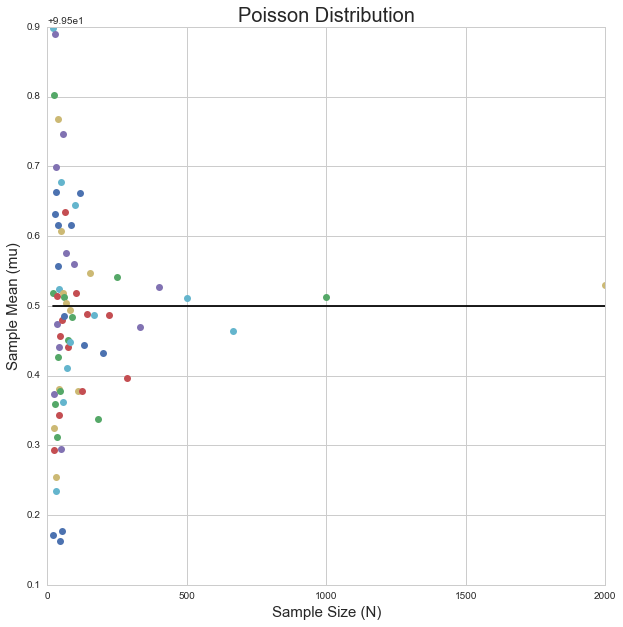

In [3]:
#Create a loop to generate 5 distributions with 100 sample size/ each.
#Distributions = ['pois', 'gaus', 'chisq','binomial', 'cauchy']
md['pois']={}
mu=mymean
sigma=1

for n in mysize:
    md['pois'][n] = np.random.normal(mu,sigma,n)

#save means for later to plot 

means['pois'] = {}
fig_mu_N = pl.figure(figsize=(10,10))
axchisq_mu_n = fig_mu_N.add_subplot(111)

for nn in md['pois'].iterkeys():
    means['pois'][nn] = md['pois'][nn].mean()
    axchisq_mu_n.plot(nn, means['pois'][nn], 'o')
    axchisq_mu_n.set_xlabel('Sample Size (N)',fontsize=15)
    axchisq_mu_n.set_ylabel('Sample Mean (mu)',fontsize=15)
    axchisq_mu_n.set_title('Poisson Distribution',fontsize=20)
axchisq_mu_n.plot([min(mysize), max(mysize)],[mymean,mymean], 'k')

## Figure 1: Poisson Distribution 
#### Its a discrete probability distribution used for counting the occuraces. 
##### lamba = mean of values 
##### variance = lamda
##### k = number of events

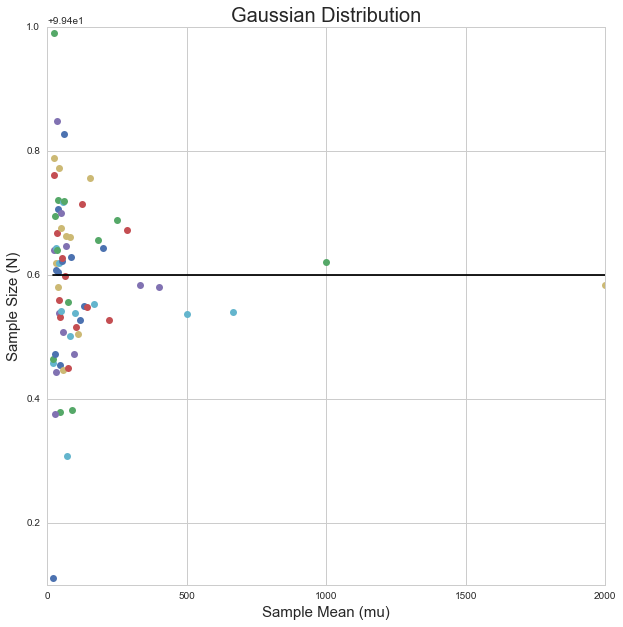

In [4]:
# Gaussion/Normal Distribution
md['gaus']={}
sigma=1

for n in mysize:
    md['gaus'][n] = np.random.normal(df, size=n)

# dictonary 'means' with gaussion distribution
means['gaus'] = {}
fig_mu_N = pl.figure(figsize=(10,10))
axchisq_mu_n = fig_mu_N.add_subplot(111)

for nn in md['gaus'].iterkeys():
    means['gaus'][nn] = md['gaus'][nn].mean()
    axchisq_mu_n.plot(nn, means['gaus'][nn], 'o')
    axchisq_mu_n.set_ylabel('Sample Size (N)',fontsize=15)
    axchisq_mu_n.set_xlabel('Sample Mean (mu)',fontsize=15)
    axchisq_mu_n.set_title('Gaussian Distribution',fontsize=20)
axchisq_mu_n.plot([min(mysize), max(mysize)],[mymean,mymean], 'k')

## Figure 2: Guassion Distribution
##### Normal distribution, continuous 

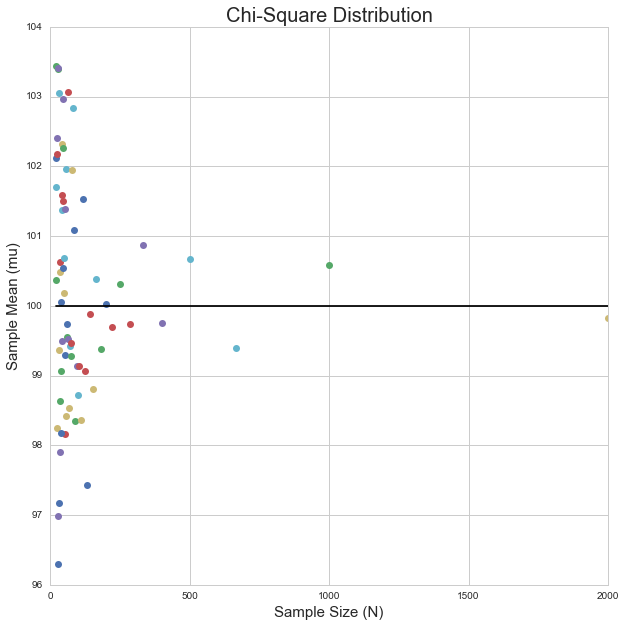

In [5]:
# Chisquare Distribution

md['chisq']={}
sigma=1

for n in mysize:
    md['chisq'][n] = np.random.chisquare(df, size=n)

means['chisq'] = {}
fig_mu_N = pl.figure(figsize=(10,10))
axchisq_mu_n = fig_mu_N.add_subplot(111)

for nn in md['chisq'].iterkeys():
    means['chisq'][nn] = md['chisq'][nn].mean()
    axchisq_mu_n.plot(nn, means['chisq'][nn], 'o')
    axchisq_mu_n.set_xlabel('Sample Size (N)',fontsize=15)
    axchisq_mu_n.set_ylabel('Sample Mean (mu)',fontsize=15)
    axchisq_mu_n.set_title('Chi-Square Distribution',fontsize=20)
axchisq_mu_n.plot([min(mysize), max(mysize)],[mymean,mymean], 'k')

## Figure 3: Chisquare Distribution

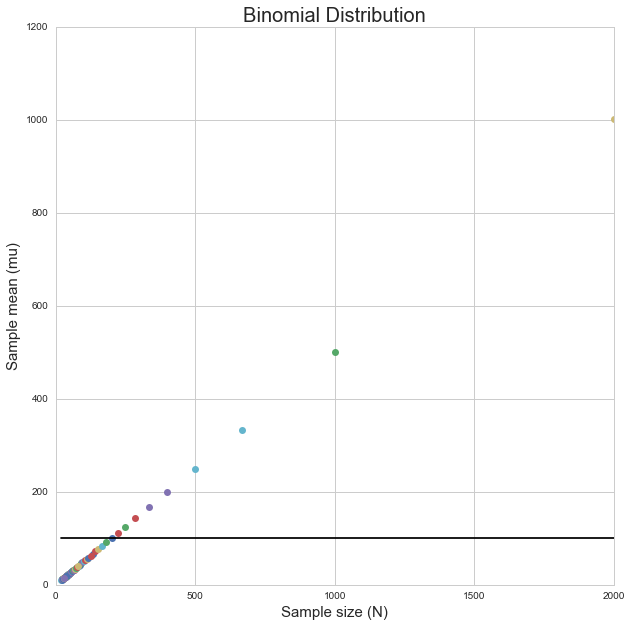

In [6]:
#Binomial Distribution
md['bino']={}
sigma=1

for n in mysize:
    md['bino'][n] = np.random.binomial(n,0.5, size=n)

means['bino'] = {}
fig_mu_N = pl.figure(figsize=(10,10))
axchisq_mu_n = fig_mu_N.add_subplot(111)

for nn in md['bino'].iterkeys():
    means['bino'][nn] = md['bino'][nn].mean()
    axchisq_mu_n.plot(nn, means['bino'][nn], 'o')
    axchisq_mu_n.set_xlabel('Sample size (N)', fontsize=15)
    axchisq_mu_n.set_ylabel('Sample mean (mu)', fontsize=15)
    axchisq_mu_n.set_title('Binomial Distribution',fontsize=20)
axchisq_mu_n.plot([min(mysize), max(mysize)],[mymean,mymean], 'k')

## Figure 4: Binomial Distribution 

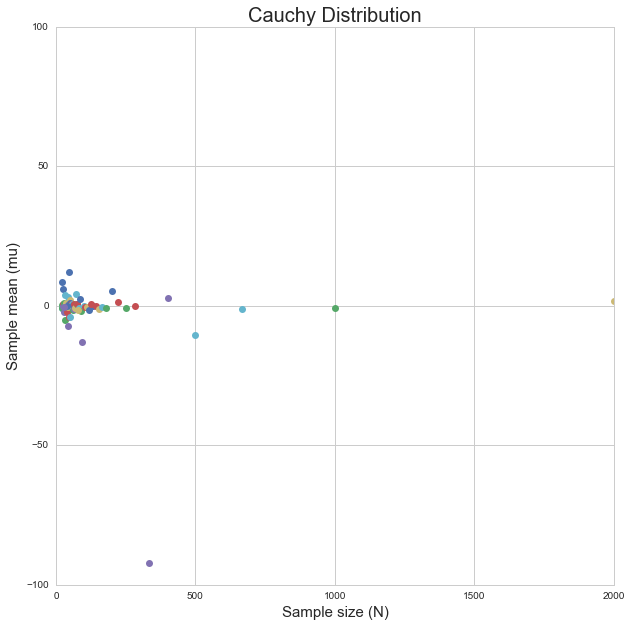

In [7]:
md['cauchy']={}
sigma=1

for n in mysize:
    md['cauchy'][n] = np.random.standard_cauchy([n])

means['cauchy'] = {}
fig_mu_N = pl.figure(figsize=(10,10))
axchisq_mu_n = fig_mu_N.add_subplot(111)

for nn in md['cauchy'].iterkeys():
    means['cauchy'][nn] = md['cauchy'][nn].mean()
    axchisq_mu_n.plot(nn, means['cauchy'][nn], 'o')
    axchisq_mu_n.set_xlabel('Sample size (N)',fontsize=15)
    axchisq_mu_n.set_ylabel('Sample mean (mu)',fontsize=15)
    axchisq_mu_n.set_title('Cauchy Distribution',fontsize=20)
axchisq_mu_n.plot([min(mysize), max(mysize)],[mymean,mymean], 'k')

## Figure 5: Cauchy Distribution

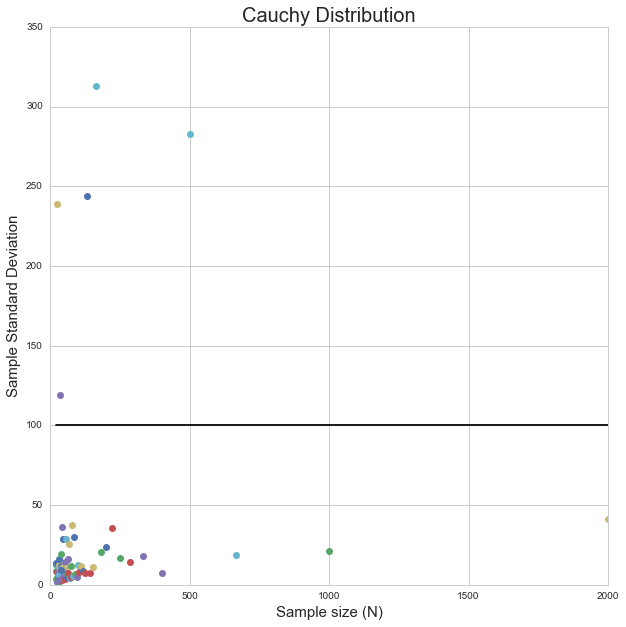

In [17]:
#Sample Standard deviation plot try
md['cauchy']={}

for n in mysize:
    md['cauchy'][n] = np.random.standard_cauchy([n])

std_devi = {}
std_devi['cauchy'] = {}
fig_mu_N = pl.figure(figsize=(10,10))
axchisq_mu_n = fig_mu_N.add_subplot(111)

for nn in md['cauchy'].iterkeys():
    std_devi['cauchy'][nn] = md['cauchy'][nn].std()
    axchisq_mu_n.plot(nn, std_devi['cauchy'][nn], 'o')
    axchisq_mu_n.set_xlabel('Sample size (N)',fontsize=15)
    axchisq_mu_n.set_ylabel('Sample Standard Deviation',fontsize=15)
    axchisq_mu_n.set_title('Cauchy Distribution',fontsize=20)
axchisq_mu_n.plot([min(mysize), max(mysize)],[mymean,mymean], 'k')

## Figure 6: Cauchy Distribution Sample size against Sample STD

From all the plots above it can be seen the mean of the sample converges to the mean of the population as the size increases and that the variance of the mean of the samples is smaller as the sample size increases. This is a consequence of the Central Limit Theorem. The variance is larger for some distribution than it is for others.


#### PLOT the distributions of all sample means (together for all distributions). Mandatory: as a histogram. Optional: in any other way you think is convincing

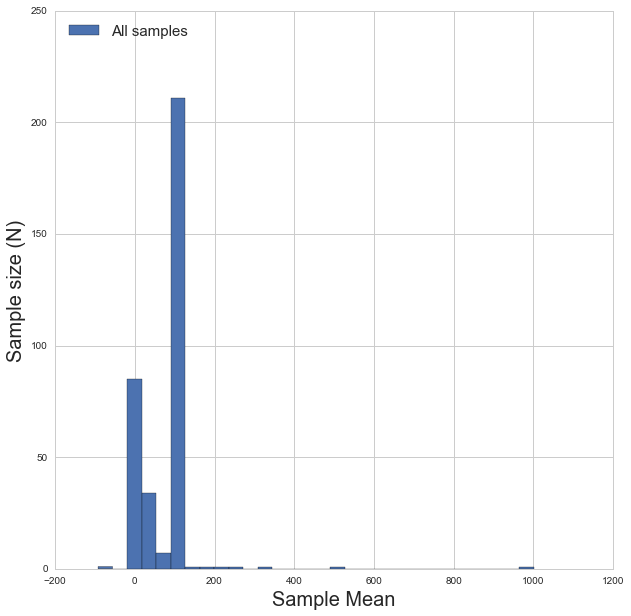

In [22]:
allmeans=[]
for m in means:
    for n in means[m]:
        allmeans.append(means[m][n])
    
pl.figure(figsize=(10,10))
pl.hist(allmeans,bins=30, label="All samples")
pl.xlabel('Sample Mean',fontsize=20)
pl.ylabel('Sample size (N)',fontsize=20)
pl.legend(loc = 2, fontsize= 15)

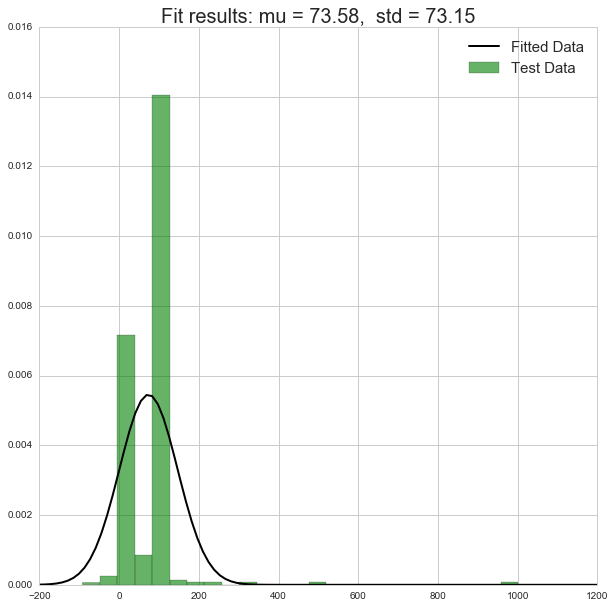

In [27]:

# Fit a gaussian distribution to all means:
mu, std = stats.norm.fit(allmeans)

# Plot the histogram.
pl.figure(figsize=(10,10))
plt.hist(allmeans, bins=25, normed=True, alpha=0.6, color='g', label = "Test Data")

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2, label = 'Fitted Data')
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title, fontsize=20)
plt.legend(fontsize=15)
plt.show()

Caption: This plot shows the distribution of all means, for each of the 5 distributions and each of the 100 samples.